**Import Required Libraries**

In [65]:
# Importing needed packages
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Load Data**

In [66]:
# loading  data from csv
df = pd.read_csv('/content/diabetes.csv')
# spliting data into independent and dependent features
x = df.iloc[:,0:8]
y = df.iloc[:,8]

**Explore Data**

In [67]:
import pandas as pd
pd.DataFrame(df).shape

(768, 9)

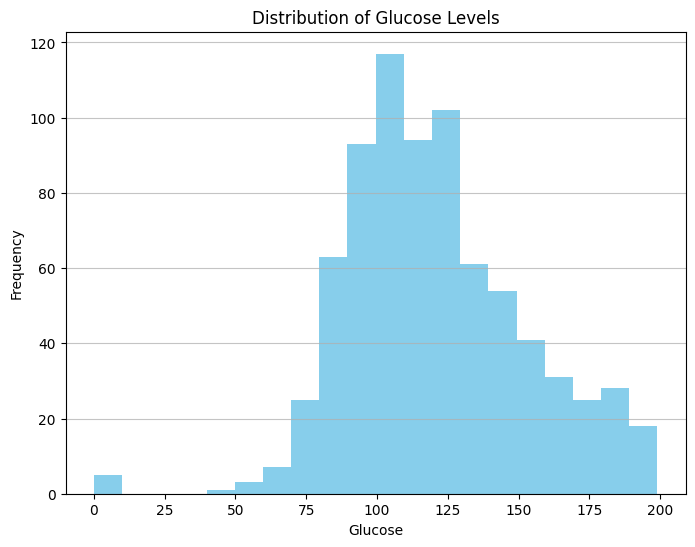

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(df['Glucose'], bins=20, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

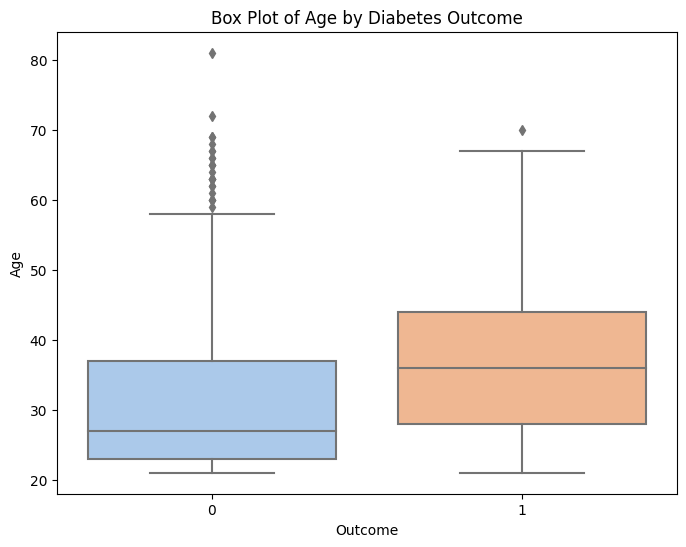

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df, palette='pastel')
plt.title('Box Plot of Age by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

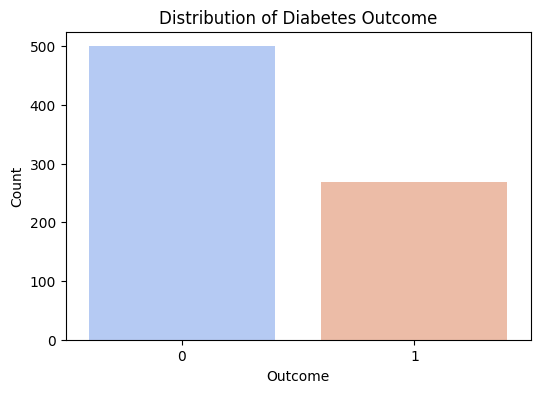

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='coolwarm')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

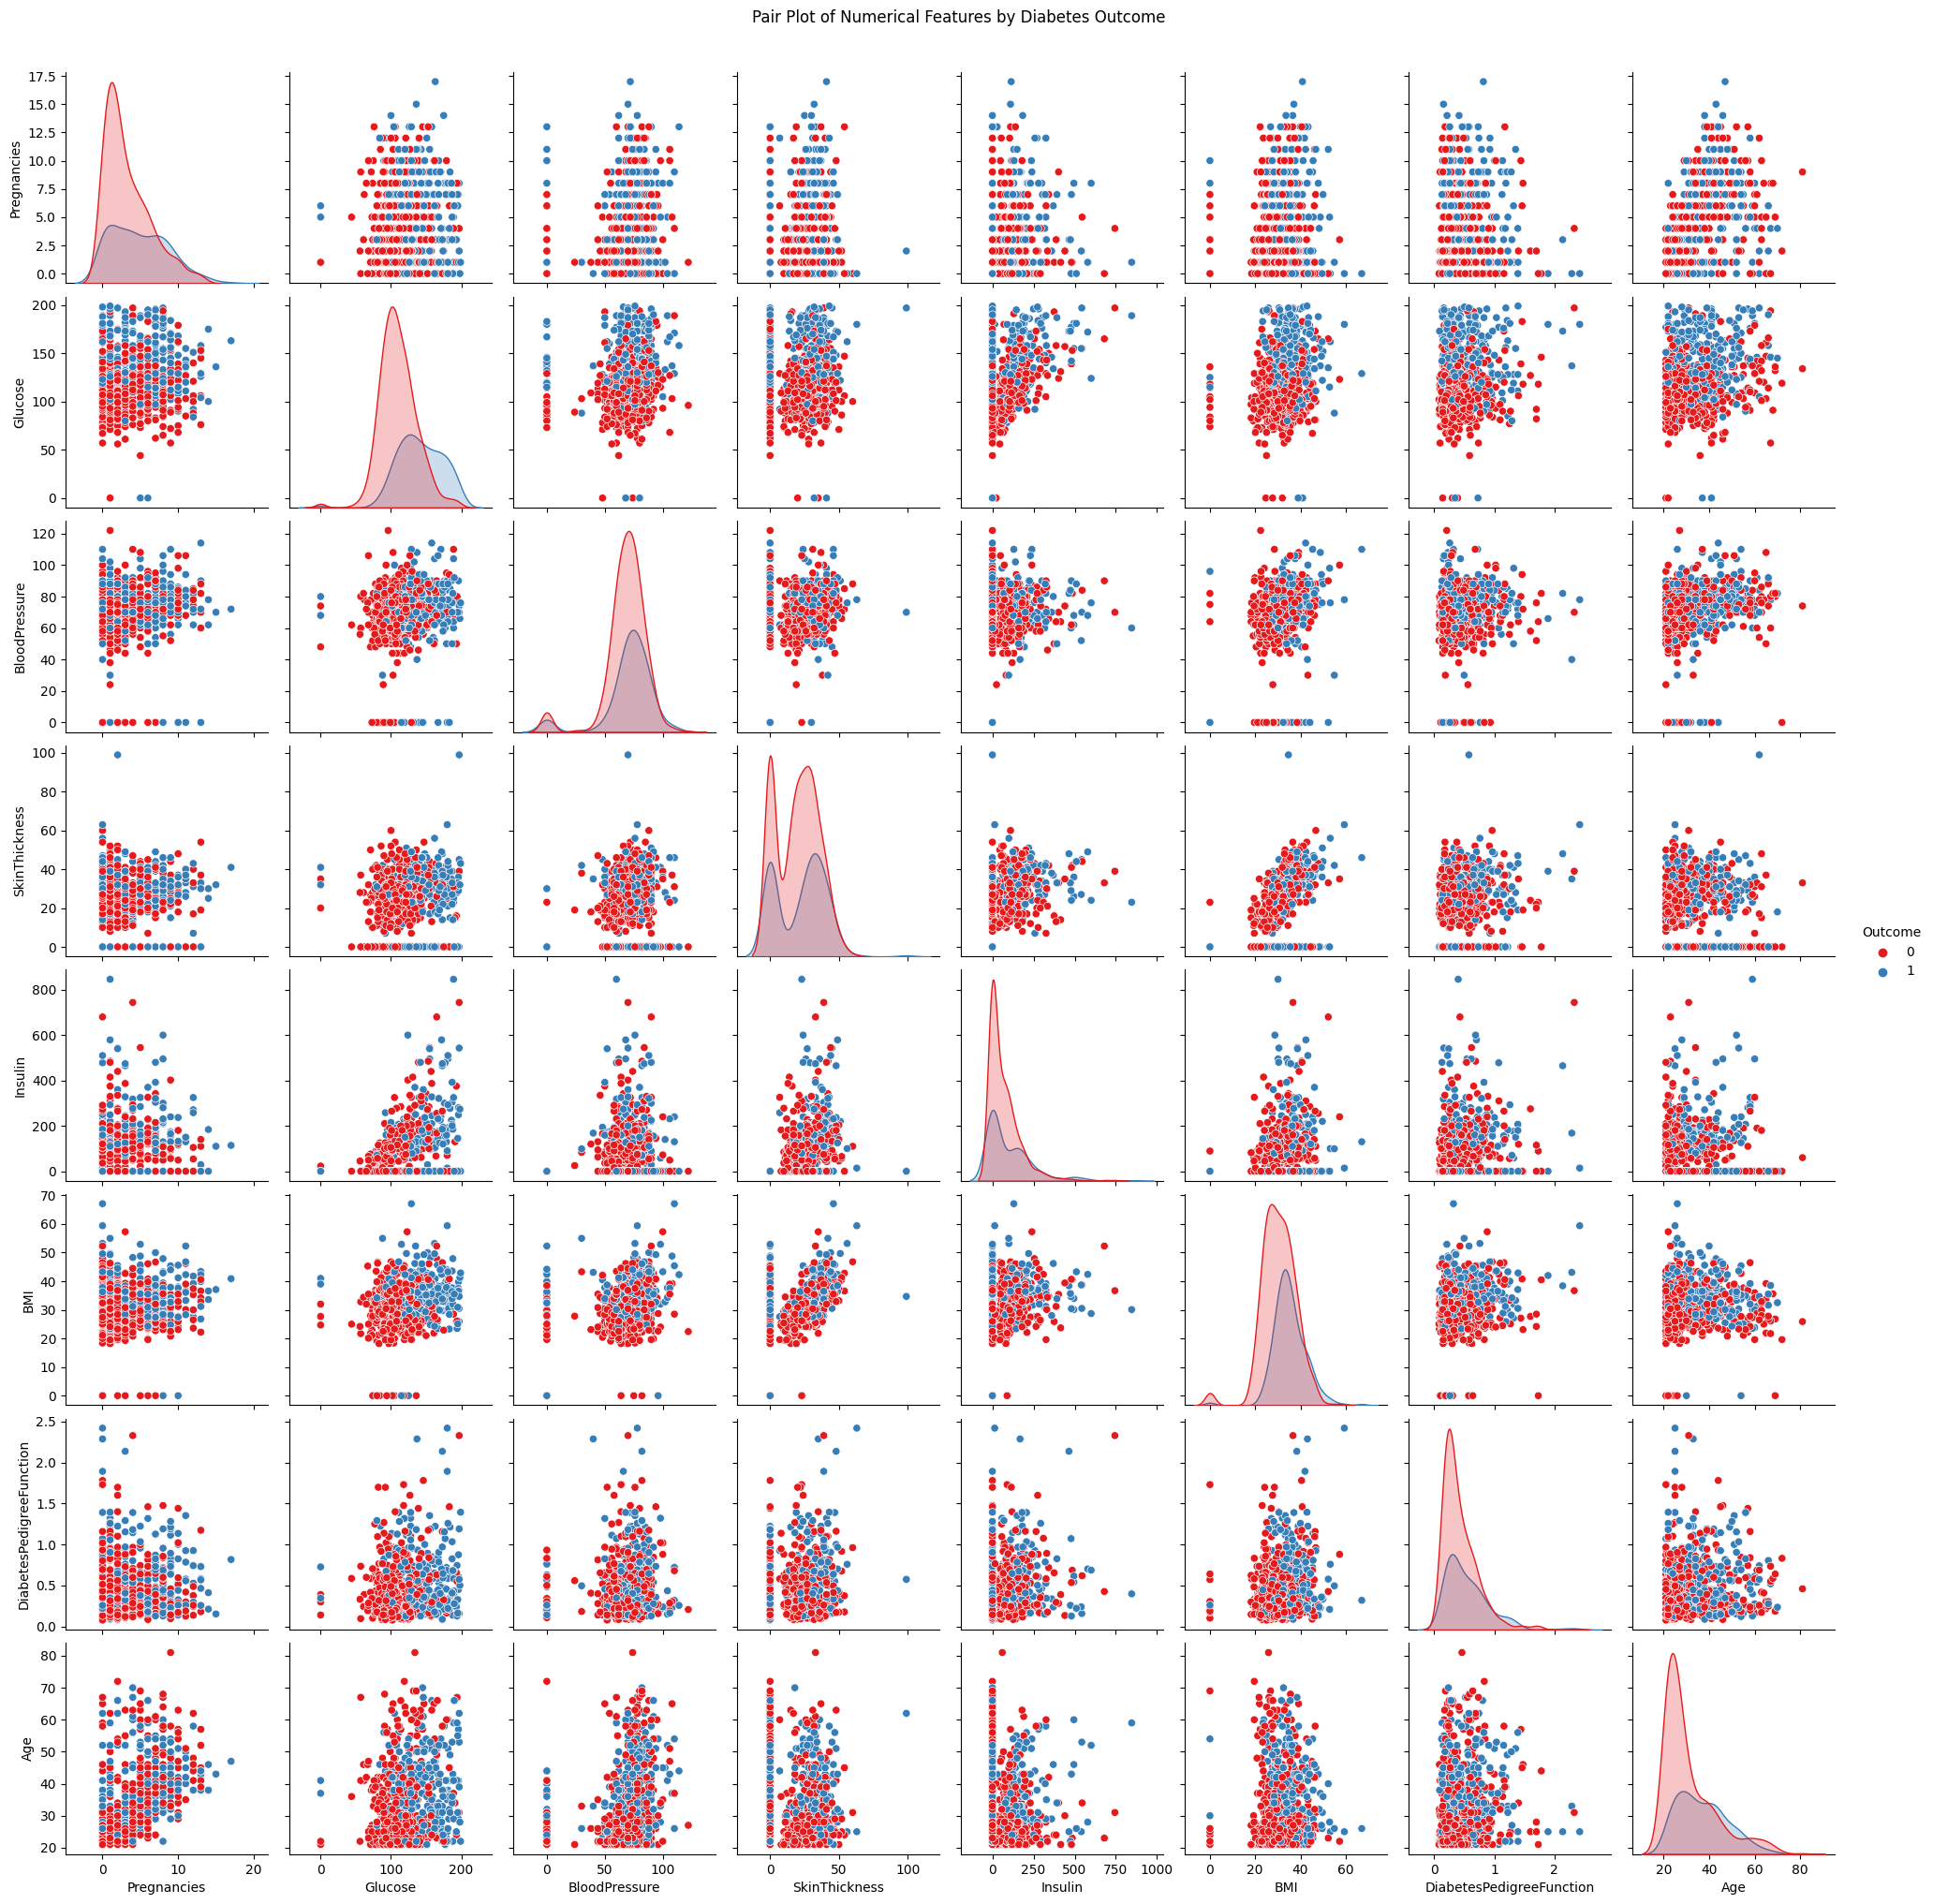

In [71]:
sns.pairplot(df, hue='Outcome', palette='Set1')
plt.suptitle('Pair Plot of Numerical Features by Diabetes Outcome', y=1.02)
plt.show()

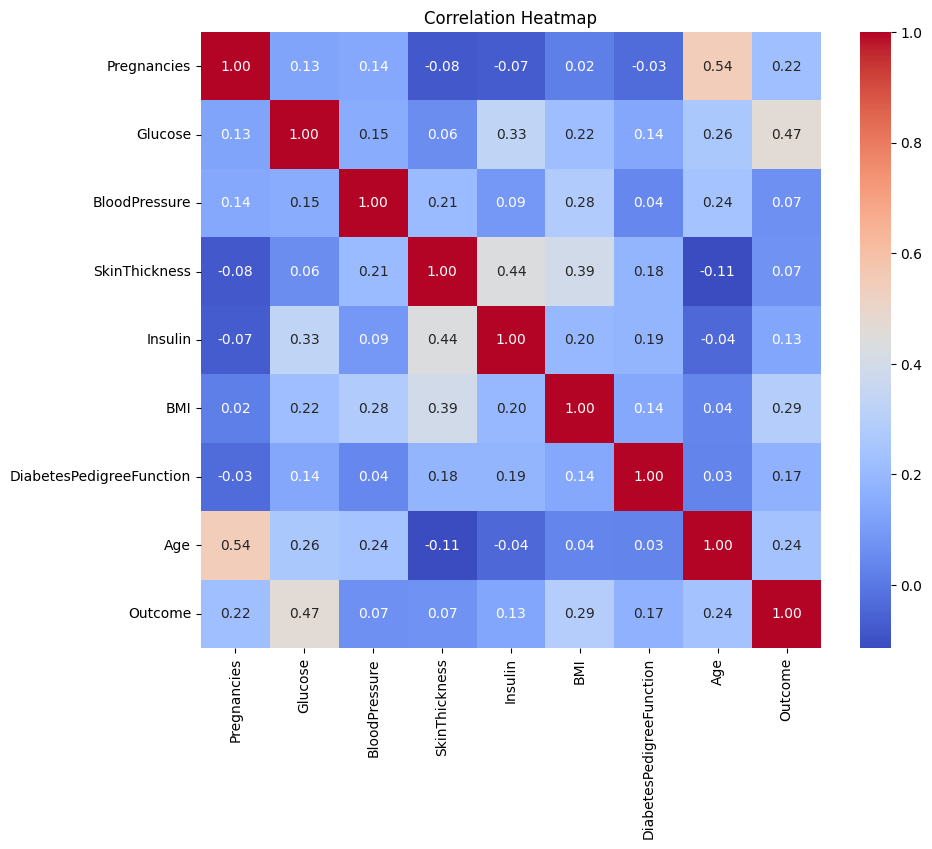

In [72]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

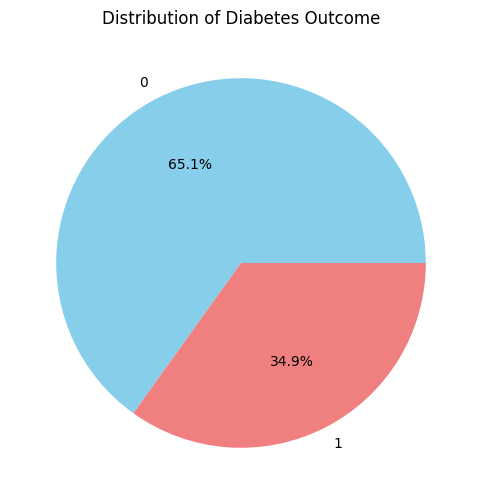

In [73]:
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Diabetes Outcome')
plt.ylabel('')
plt.show()

**Split Data**

In [74]:
# split data into train and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)

**Models**

In [76]:
from xgboost.core import Booster
#Running various models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB',XGBClassifier(eta=0.01,gamma=10,Booster='dart')))

import time

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)
    print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 77.92% LogisticRegression
--- 0.04549837112426758 seconds ---
Accuracy: 73.38% KNN
--- 0.028702735900878906 seconds ---
Accuracy: 78.57% SVM
--- 0.05543804168701172 seconds ---
[09:48:28] WARNING: ../src/learner.cc:767: 
Parameters: { "Booster" } are not used.

Accuracy: 78.57% XGB
--- 0.41405415534973145 seconds ---
